In [12]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC

In [2]:
df = pd.read_csv('train.csv')
df.head()

X=df['Message']
Y=df['Type']

In [3]:
df_test = pd.read_csv('test.csv')
df_test.head()

X_test1=df_test['Message']
Y_test1=df_test['Type']

In [4]:
df.describe()

,Type,Message
count,4142,4142
unique,2,3906
top,Friendly,"Ksnnk, S'xx myxx xyban"
freq,3585,26


In [5]:
spam_messages = df[df["Type"]=="Hostile"]
spam_messages.head()

,Type,Message
4,Hostile,XnaaUuo Lak bvana tynxclo cb'u faal 3 waaq'u l...
6,Hostile,Lyt ksin esfcxa 11 eslbvu sn esna? Y D albcbxa...
8,Hostile,"KST mvylmau bs wcl COKL! Xnse 100 bs 20,000 zs..."
9,Hostile,YDEQBR! Asi vypa wsl y 1 waaq XDQQ eaefanuvcz ...
12,Hostile,"TTTUsfcxaUspcaCxif: Rs iua ksin mnatcb, mxcmq ..."


In [6]:
spam_messages.describe()

,Type,Message
count,557,557
unique,1,501
top,Hostile,LUF VIBYK KPQCSON 500 zsiltu sh oalicla LUF ps...
freq,557,3


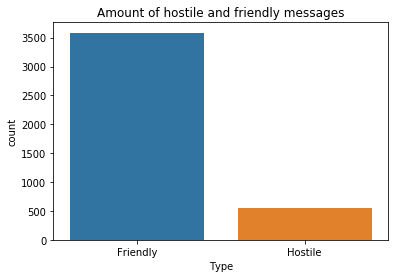

In [7]:
sns.countplot(data = df, x= df["Type"]).set_title("Amount of hostile and friendly messages")
plt.show()

**Splitting the SMS data into Test and Train data**

In [8]:
data_train, data_test, labels_train, labels_test = train_test_split(X,Y,test_size=0.2,random_state=0) 
print("data_train, labels_train : ",data_train.shape, labels_train.shape)
print("data_test, labels_test: ",data_test.shape, labels_test.shape)

data_train, labels_train :  (3313,) (3313,)
data_test, labels_test:  (829,) (829,)


In [10]:
vectorizer = CountVectorizer()
tfidf_vectorizer = TfidfVectorizer(analyzer = 'char', max_df=0.25,ngram_range=(1,8))
tfidf = tfidf_vectorizer.fit(data_train)
data_train_count  = tfidf.transform(data_train)
data_test_count  = tfidf.transform(data_test)
data_test_count2 = tfidf.transform(X_test1)

In [11]:
data_test_count.shape, data_test_count2.shape

((829, 550586), (1380, 550586))

In [15]:
for i in range(1,50):
    clf = MultinomialNB(alpha=i*.0044)
    clf2= LinearSVC()
    clf.fit(data_train_count, labels_train)
    clf2.fit(data_train_count, labels_train)
    predictions = clf.predict(data_test_count)
    predictions2 = clf2.predict(data_test_count)
    #print ("accuracy_score : ", i,accuracy_score(labels_test, predictions))
    print ("accuracy_score : ", i,accuracy_score(labels_test, predictions2))

accuracy_score :  1 0.991556091676719
accuracy_score :  2 0.991556091676719
accuracy_score :  3 0.991556091676719
accuracy_score :  4 0.991556091676719
accuracy_score :  5 0.991556091676719
accuracy_score :  6 0.991556091676719
accuracy_score :  7 0.991556091676719
accuracy_score :  8 0.991556091676719
accuracy_score :  9 0.991556091676719
accuracy_score :  10 0.991556091676719
accuracy_score :  11 0.991556091676719
accuracy_score :  12 0.991556091676719
accuracy_score :  13 0.991556091676719
accuracy_score :  14 0.991556091676719
accuracy_score :  15 0.991556091676719
accuracy_score :  16 0.991556091676719
accuracy_score :  17 0.991556091676719
accuracy_score :  18 0.991556091676719
accuracy_score :  19 0.991556091676719
accuracy_score :  20 0.991556091676719
accuracy_score :  21 0.991556091676719
accuracy_score :  22 0.991556091676719
accuracy_score :  23 0.991556091676719
accuracy_score :  24 0.991556091676719
accuracy_score :  25 0.991556091676719
accuracy_score :  26 0.99155609167

In [17]:
print ("accuracy_score : ", accuracy_score(labels_test, predictions2))

accuracy_score :  0.991556091676719


In [18]:
print ("confusion_matrix : \n", confusion_matrix(labels_test, predictions2))

confusion_matrix : 
 [[709   0]
 [  7 113]]


In [19]:
print (classification_report(labels_test, predictions2))

              precision    recall  f1-score   support

    Friendly       0.99      1.00      1.00       709
     Hostile       1.00      0.94      0.97       120

    accuracy                           0.99       829
   macro avg       1.00      0.97      0.98       829
weighted avg       0.99      0.99      0.99       829



In [20]:
predictions_test = clf2.predict(data_test_count2)

In [21]:
df_predictions_test=pd.DataFrame(predictions_test)
df_predictions_test.to_csv('predictions_test8_cv.csv')

In [63]:
from sklearn.model_selection import KFold, cross_val_score
k_fold = KFold(n_splits=40, shuffle=True, random_state=0)

for i in range(1,10):
    clf = MultinomialNB(alpha=i*.00000001)
    print(np.mean(cross_val_score(clf, data_train_count, labels_train, cv=k_fold, n_jobs=1)),np.var(cross_val_score(clf, data_train_count, labels_train, cv=k_fold, n_jobs=1)))

KeyboardInterrupt: 

In [22]:
X_Train = np.array(data_train_count)
X_Test = np.array(data_test_count)
y = np.array(labels_train)

In [103]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
classifier = Pipeline([
                      ('tfidf', TfidfVectorizer(analyzer='char')),
                      ('clf', MultinomialNB())
])

classifier.fit(X,Y)


from sklearn.model_selection import GridSearchCV
parameters = { 
              'tfidf__ngram_range': [(1,9)],
              'tfidf__max_features': [500000,600000],
              'clf__alpha': [.0045,.00445,.00455],
}
gs_clf = GridSearchCV(classifier, parameters,cv=10)
gs_clf.fit(X, Y)


print(gs_clf.best_params_)
# Predicting the Test set results
#y_pred_proba = gs_clf.predict(data_test_count)

KeyboardInterrupt: 

In [29]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
classifier = Pipeline([
                      ('tfidf', TfidfVectorizer(analyzer='char')),
                      ('clf', LinearSVC())
])

classifier.fit(X,Y)


from sklearn.model_selection import GridSearchCV
parameters = { 
              'tfidf__ngram_range': [(1,8),(1,9),(1,10)],
              'tfidf__max_df':[.2,.5,.7,.95],
              'tfidf__min_df':[1,2,3],
}
gs_clf = GridSearchCV(classifier, parameters,cv=5)
gs_clf.fit(X, Y)


print(gs_clf.best_params_)
# Predicting the Test set results
#y_pred_proba = gs_clf.predict(data_test_count)

{'tfidf__max_df': 0.7, 'tfidf__min_df': 2, 'tfidf__ngram_range': (1, 9)}


In [ ]:
gs_clf.best_params_
gs_clf.cv_results_

In [ ]:
'tfidf__analyzer' : ['char','word'],